# Use CPlantBox with one click
In this tutorial, you only need to click the small triangle button on the left top corner of the code blocks. 
If the circling triangle finished, please go to the next block and run the next block. 
If you need to learn google colab please follow the link here https://colab.research.google.com/notebooks/welcome.ipynb


In [ ]:
#<---Click this triangle to load python libraries
# loading other python library or packages. Only need to run once at the start.
import os
import sys
! pip3 install vtk
from vtk.util import numpy_support as VN
import vtk
! git clone https://github.com/Plant-Root-Soil-Interactions-Modelling/CPlantBox # downloading the source code
os.chdir("/content/CPlantBox/tutorial/jupyter") # Change to the python directory (working directory)
# Congrats! Now you are ready to use the CPlantBox
!rm modelparameter
!ln -s /content/CPlantBox/modelparameter/ modelparameter
# Loading specific python scripts for CPlantBox and CRootBox


## 2. Detailed usage of CPlantBox
1. create several different plant.

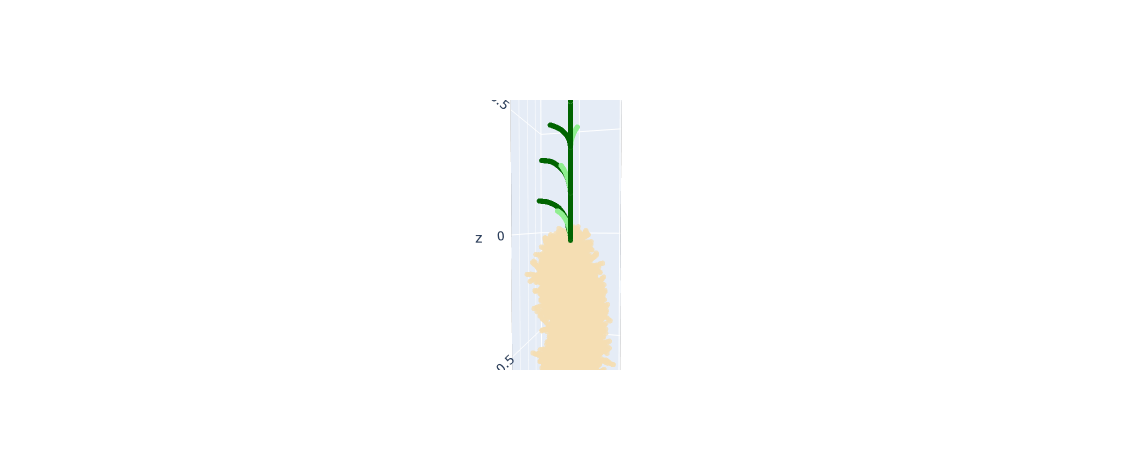

In [1]:
from CPlantBox_PiafMunch import *
plotly.__version__
# first we create a Heliantus plant
name = "Heliantus_Pagès_2013.xml" # parameter name
# here are some optional parameters to be tested
# name = "PMA2018" # Simulate a small plant with 3 leaves and two lateral root, you can comment the heliantus line and uncomment this line to see what happend.
time = 70 # how many days the plant need to grow, make it smaller, for example 15 to see if the plant becomes smaller
plant1 = CPlantBox(name, time, name) # make a plant object in python
# Visualization
fig = visual_plant(plant1)
fig.show()
# it is easy to use for loop in python to create many plant at a time.
for i in range(0,9):    
    plant1 = CPlantBox_analysis('{}.xml'.format(str(i)), 180, '{}'.format(str(i)))

## 3. Rewirte the visualization function


In [2]:
def visual_plant_sub(plant1,name='plant'):
    nodes_cor = python_nodes(plant1) # use the object name created previously to get its coordinates
    fig= go.Scatter3d(
        x=nodes_cor.T[3],
        y=nodes_cor.T[4],
        z=nodes_cor.T[5],
        mode='markers',
        marker=dict(
            size=3,
            color=nodes_cor.T[1],                # nodes_cor.T[1] is organ type, nodes_cor.T[2] is the connection number of a node 
            colorscale=[[0, "wheat"], #color of the root, change it to "yellow" to see the difference
                    [0.5, "darkgreen"],
                    [1.0, "lightgreen"],],  opacity=0.8
        ), name =name
    )

    return fig

def visual_plant(plant1):
    subfig = visual_plant_sub(plant1)
    fig = make_subplots(
    rows=1, cols=1,
    specs=[[{'type': 'surface'}]])
    fig.add_trace(subfig) 
    fig.update_layout(scene_aspectmode='data',)
    return fig

In [2]:
from itkwidgets import view
import vtk

In [5]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [7]:
def f(x):
    return x
for i in range(1,4):
  interact(f, x=10);

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

In [3]:
file_name = '8.vtp'
reader = vtk.vtkXMLPolyDataReader()
path = "{}".format(file_name) #path or name of the vtp output
reader.SetFileName(path)
reader.Update()
polydata = reader.GetOutput()

view(geometries=polydata)

Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…

In [17]:
# plant1.getPolylines()
# plant1.getSegmentOrigins().getOrganType()
help(plant1.getSegmentOrigins())

Help on list object:

class list(object)
 |  list() -> new empty list
 |  list(iterable) -> new list initialized from iterable's items
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __iadd__(self, value, /)
 |      Implement self+=value.
 |  
 |  __imul__(self, value, /)
 |      Implement self*=value.
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __le__(self, value, /

## 4. Read and write parameter files.
1. CPlantBox use XML file to parameterize the plant, the file could be a little bit scarry at first glance. However, here I will give you examples to try each parameter. In this way you will know all the parameters quickly.
Firstly, we print out all the parameters:

In [ ]:
name= "PMA2018" #name of the small plant
all_parameter = ET.parse("modelparameter/plant/{}.xml".format(name)) # read the parameter file from xml file../
plant_parameter = all_parameter.getroot() # get the first level of parameters
parameter_options={}
parameter_order = 0
for organ in plant_parameter.iter('organ'): 
    list=[]
    print(organ.attrib ) # print of parameters
    
    for parameter in organ.iter('parameter'): 
        
        print(parameter.attrib)
        
        list.append(parameter.attrib['name']) 
        parameter_order = parameter_order+1
    print("\n" )
    parameter_options[organ.attrib['type']+organ.attrib['subType']] = list

In [ ]:
# here we show what is the plant simulated based on those parameters
name= "PMA2018"
smallplant = CPlantBox(name, time, name) # make a plant object in python
fig = visual_plant(smallplant)    
fig.show()

## 5. Change the length of the Stem
### 5.1 lmax: the maximal length
Length is controled by six parameters, among them, the maximal length is controled by lmax. if we only change the lmax, the growth will only depends on the time. Lets see what will happend if we only change the lmax of the main stem:

In [ ]:

change_parameter('PMA2018', 'testXML', 'stem', '1', 'lmax', 'value','10')
name = 'testXML'
smallplant = CPlantBox(name, time, name) # make a plant object in python
fig = visual_plant(smallplant)    
fig.show()
# Try to change the "10" to 5
change_parameter('PMA2018', 'testXML', 'stem', '1', 'lmax', 'value','5')
smallplant = CPlantBox(name, time, name) # make a plant object in python
fig = visual_plant(smallplant)    
fig.show()

### 5.2 lb, ln and la: the parameters controls branching
In the previous section, you may notice that, with the increase of the lmax, the length of the main stem increased. But with the increase length of the stem, we also get more leaves. Is it possible to reduce the leaf numbers? There are two ways, first, we could change the lb, lb is the length at bottom without any branching.

In [ ]:
# change lb to 3 based on the testXML created in last section
name = 'testXML'
change_parameter('testXML', 'testXML', 'stem', '1', 'lb', 'value','3')
smallplant = CPlantBox(name, time, name) # make a plant object in python
fig = visual_plant(smallplant)    
fig.show()
# now there is 3 branches again

### 5.2.2 Let's change the ln to see what will happen?
ln is the internode distance

In [ ]:
name = 'testXML'
change_parameter('testXML', 'testXML', 'stem', '1', 'ln', 'value','0.3')
smallplant = CPlantBox(name, time, name) # make a plant object in python
fig = visual_plant(smallplant)    
fig.show()

### 5.2.2Let's change the la to see what will happen?
la is the stem top without branches

In [ ]:
name = 'testXML'
change_parameter('testXML', 'testXML', 'stem', '1', 'la', 'value','2')
smallplant = CPlantBox(name, time, name) # make a plant object in python
fig = visual_plant(smallplant)    
fig.show()

In [ ]:
# in addition, the functiontype decides what branching internode distance will be
name = 'testXML'
change_parameter('testXML', 'testXML', 'stem', '1', 'ln', 'functiontype','1')
smallplant = CPlantBox(name, time, name) # make a plant object in python
fig = visual_plant(smallplant)    
fig.show()

In [ ]:

fig = make_subplots(
    rows=3, cols=2,
    specs=[[{'type': 'scatter3d'}, {'type': 'scatter3d'}],
           [{'type': 'scatter3d'}, {'type': 'scatter3d'}],
           [{'type': 'scatter3d'}, {'type': 'scatter3d'}]])

name = 'testXML'
change_parameter('testXML', 'testXML', 'stem', '1', 'lmax', 'value','20')
change_parameter('testXML', 'testXML', 'leaf', '2', 'RotBeta', 'value','1')
change_parameter('testXML', 'testXML', 'stem', '1', 'ln', 'functiontype','0')
smallplant1 = CPlantBox(name, time, name) # make a plant object in python
fig1 = visual_plant_sub(smallplant1,name="functiontype 0")

name = 'testXML'
change_parameter('testXML', 'testXML', 'stem', '1', 'ln', 'functiontype','1')
smallplant2 = CPlantBox(name, time, name) # make a plant object in python
fig2 = visual_plant_sub(smallplant2,name="functiontype 1")

name = 'testXML'
change_parameter('testXML', 'testXML', 'stem', '1', 'ln', 'functiontype','2')
smallplant3 = CPlantBox(name, time, name) # make a plant object in python
fig3 = visual_plant_sub(smallplant3,name="functiontype 2")

name = 'testXML'
change_parameter('testXML', 'testXML', 'stem', '1', 'ln', 'functiontype','3')
smallplant4 = CPlantBox(name, time, name) # make a plant object in python
fig4 = visual_plant_sub(smallplant4,name="functiontype 3")

name = 'testXML'
change_parameter('testXML', 'testXML', 'stem', '1', 'ln', 'functiontype','2')
smallplant5 = CPlantBox(name, time, name) # make a plant object in python
fig5 = visual_plant_sub(smallplant3,name="functiontype 4")

name = 'testXML'
change_parameter('testXML', 'testXML', 'stem', '1', 'ln', 'functiontype','3')
smallplant6 = CPlantBox(name, time, name) # make a plant object in python
fig6 = visual_plant_sub(smallplant4,name="functiontype 5")

fig.add_trace(fig1, 1, 1 )
fig.add_trace(fig2, 1, 2)
fig.add_trace(fig3, 2, 1)
fig.add_trace(fig4, 2, 2)
fig.add_trace(fig5, 3, 1)
fig.add_trace(fig6, 3, 2)

fig.update_layout(
    title_text='different RotBeta (function type)',
    height=800,
    width=800
)

fig.show()

## 6. Change the rotation of the Stem
### Rotation Theta (rotaBeta) : the angle between main stem and sub branch
### Rotation Beta (rotaBeta) : the angle between two neigbour sub branch
the value of Rotation multiply by Pie is the revlution of the neighbouring sub branch.

In [ ]:
from plotly.subplots import make_subplots
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{'type': 'scatter3d'}, {'type': 'scatter3d'}],
           [{'type': 'scatter3d'}, {'type': 'scatter3d'}]])

name = 'testXML'
change_parameter('testXML', 'testXML', 'stem', '1', 'lmax', 'value','20')
change_parameter('testXML', 'testXML', 'leaf', '2', 'RotBeta', 'value','0')
smallplant1 = CPlantBox(name, time, name) # make a plant object in python
fig1 = visual_plant_sub(smallplant1,name="0 degree rotation")

name = 'testXML'
change_parameter('testXML', 'testXML', 'leaf', '2', 'RotBeta', 'value','0.5')
smallplant2 = CPlantBox(name, time, name) # make a plant object in python
fig2 = visual_plant_sub(smallplant2,name="90 degree rotation")

name = 'testXML'
change_parameter('testXML', 'testXML', 'leaf', '2', 'RotBeta', 'value','1')
smallplant3 = CPlantBox(name, time, name) # make a plant object in python
fig3 = visual_plant_sub(smallplant3,name="180 degree rotation")

name = 'testXML'
change_parameter('testXML', 'testXML', 'leaf', '2', 'RotBeta', 'value','1.5')
smallplant4 = CPlantBox(name, time, name) # make a plant object in python
fig4 = visual_plant_sub(smallplant4,name="270 degree rotation")

fig.add_trace(fig1, 1, 1 )
fig.add_trace(fig2, 1, 2)
fig.add_trace(fig3, 2, 1)
fig.add_trace(fig4, 2, 2)

fig.update_layout(
    title_text='different RotBeta (function type)',
    height=800,
    width=800
)

fig.show()

## 7. 



